In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

import warnings
warnings.filterwarnings("ignore")

Importing File

In [ ]:
file = '/content/drive/MyDrive/Abhay/Capstone Project/Social Media_Tourism_Project/Data /Social Media Data for DSBA.csv'
social_df = pd.read_csv(file)

## 1) Describe Data

In [ ]:
social_df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [ ]:
social_df.tail()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0,20
11759,1011760,No,270.0,Tab,22025.0,8,3,Historical site,104.0,4470,2,No,29,No,1,0,14


In [ ]:
print("Number of rows:- ", social_df.shape[0], "\n" "Number of Columns:- ", social_df.shape[1])

Number of rows:-  11760 
Number of Columns:-  17


In [ ]:
social_df.dtypes.value_counts()

int64      7
object     7
float64    3
dtype: int64

In [ ]:
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
# Here we observe "yearly_avg_Outstation_checkins" and "member in family" are in object type this means some character in there in data this is bad data we have to clean this and convert these data into int64/float.
# There are some missing values in some features we have to treat them as well.



In [ ]:
social_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11179.0,2.808308e+02,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,2.817048e+04,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,7.479003e+01,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,2.866156e+01,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245e+00,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,7.938776e-01,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,1.381743e+01,9.070657,0.0,8.00,12.0,18.00,270.0


## 2) Data Pre-Processing

2-1) Treat Bad Data

In [ ]:
social_df.yearly_avg_Outstation_checkins.value_counts(dropna=False)

1      4543
2       844
10      682
9       340
3       336
7       336
8       320
5       261
4       256
16      255
6       236
11      229
24      223
29      215
23      215
18      208
15      206
20      199
26      199
25      198
28      180
19      176
14      167
17      160
12      159
22      152
13      150
21      143
27       96
NaN      75
*         1
Name: yearly_avg_Outstation_checkins, dtype: int64

In [ ]:
# we have "*"" in data, we have to either convert this into missing values or 
# we can replace this with mode.

In [ ]:
social_df.yearly_avg_Outstation_checkins = social_df.yearly_avg_Outstation_checkins.replace({"*":1,"1":1})

In [ ]:
social_df.yearly_avg_Outstation_checkins.value_counts(dropna=False)

1      4544
2       844
10      682
9       340
3       336
7       336
8       320
5       261
4       256
16      255
6       236
11      229
24      223
29      215
23      215
18      208
15      206
26      199
20      199
25      198
28      180
19      176
14      167
17      160
12      159
22      152
13      150
21      143
27       96
NaN      75
Name: yearly_avg_Outstation_checkins, dtype: int64

In [ ]:
social_df.preferred_location_type.value_counts(dropna=False)

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
NaN                  31
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [ ]:
#In this feature we can see "Tours and Travel" is repeat as some difference Tours Travel  we have to clean this and append to one
# we can also add small frequency into other

In [ ]:

social_df.preferred_location_type = social_df.preferred_location_type.str.replace("Tour and Travel","Tour & Travel")

In [ ]:
social_df.preferred_location_type = social_df.preferred_location_type.str.replace("Tour  Travel" ,"Tour & Travel")

In [ ]:
social_df.preferred_location_type = social_df.preferred_location_type.str.replace("OTT", "Other")
social_df.preferred_location_type = social_df.preferred_location_type.str.replace("Game", "Other")
social_df.preferred_location_type = social_df.preferred_location_type.str.replace("Movie", "Other")


In [ ]:
social_df.preferred_location_type.value_counts(dropna=False)

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               667
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour & Travel       107
NaN                  31
Name: preferred_location_type, dtype: int64

In [ ]:
social_df.member_in_family.value_counts(dropna=False)

3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dtype: int64

In [ ]:
# 3 is added as Three insted of 3. we have to convert this into 3 and change data type as well

In [ ]:
social_df.member_in_family = social_df.member_in_family.replace({"Three":3,"3":3})

In [ ]:
social_df.member_in_family.value_counts(dropna=False)

3     4576
4     3184
2     2256
1     1349
5      384
10      11
Name: member_in_family, dtype: int64

In [ ]:
social_df.preferred_device.value_counts(dropna=False)

Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
NaN                  53
Other                 2
Others                2
Name: preferred_device, dtype: int64

In [ ]:
# we can change this features into Tab, Mobile, Laptop

In [ ]:
#social_df.preferred_device = social_df.preferred_device.str.replace("iOS", "mobile")
#social_df.preferred_device = social_df.preferred_device.str.replace("mobile and Android and Android", "mobile")
#social_df.preferred_device = social_df.preferred_device.str.replace("mobile and Android", "mobile")
#social_df.preferred_device = social_df.preferred_device.str.replace("Android", "mobile")
#social_df.preferred_device = social_df.preferred_device.str.replace("Mobile", "mobile")
#social_df.preferred_device = social_df.preferred_device.str.replace("Android OS", "mobile")
#social_df.preferred_device = social_df.preferred_device.str.replace("ANDROID", "mobile")
#social_df.preferred_device = social_df.preferred_device.str.replace("Other", "mobile")
#social_df.preferred_device = social_df.preferred_device.str.replace("Others", "mobile")
#social_df.preferred_device = social_df.preferred_device.str.replace("mobiles", "mobile")
#social_df.preferred_device = social_df.preferred_device.str.replace("mobile OS", "mobile")



In [ ]:
social_df['preferred_device'] = np.where(social_df['preferred_device'] == 'Laptop','Laptop','Mobile')

In [ ]:
social_df['preferred_device']=np.where(social_df['preferred_device'] =='Mobile','1', social_df['preferred_device'])
social_df['preferred_device']=np.where(social_df['preferred_device'] =='Laptop','0', social_df['preferred_device'])

In [ ]:
social_df['preferred_device']=social_df['preferred_device'].astype('float64')

In [ ]:
social_df.preferred_device.value_counts(dropna=False)

1.0    10652
0.0     1108
Name: preferred_device, dtype: int64

In [ ]:
social_df.working_flag.value_counts(dropna=False)

No     9952
Yes    1808
Name: working_flag, dtype: int64

In [ ]:
social_df.Adult_flag.value_counts(dropna=False)

0    5048
1    4768
2    1264
3     680
Name: Adult_flag, dtype: int64

In [ ]:
# here as per features there should be two factors be there as yes or no However we have 2 and 3 additional one 
# either we can assume 2 and 3 are adult OR
# we assume as if person is working this means he is adult else not adult.

# here as assume first part as 2 and 3 are part of adult rest are minors

In [ ]:
social_df.Adult_flag = np.where(social_df.Adult_flag >=1,1,0)

In [ ]:
social_df.Adult_flag.value_counts(dropna=False)

1    6712
0    5048
Name: Adult_flag, dtype: int64

In [ ]:
social_df.following_company_page.value_counts(dropna=False)

No     8355
Yes    3285
NaN     103
1        12
0         5
Name: following_company_page, dtype: int64

In [ ]:
social_df.following_company_page = social_df.following_company_page.str.replace('1','Yes').str.replace('0','No')


In [ ]:
social_df.following_company_page.value_counts(dropna=False)

No     8360
Yes    3297
NaN     103
Name: following_company_page, dtype: int64

In [ ]:
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11760 non-null  float64
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  int64  
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
# drop User ID feature

In [ ]:
social_df = social_df.drop(['UserID'], axis = 1)

In [ ]:
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11760 non-null  float64
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11685 non-null  object 
 5   member_in_family                              11760 non-null  int64  
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [ ]:
for column in social_df.columns:
  if social_df[column].dtype == 'object':
    print(column.upper(),':', social_df[column].unique())
    print(social_df[column].value_counts())
    print('\n')

TAKEN_PRODUCT : ['Yes' 'No']
No     9864
Yes    1896
Name: Taken_product, dtype: int64


YEARLY_AVG_OUTSTATION_CHECKINS : [1 '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '5' '8' '2' '3' '9' '7' '6' '4']
1     4544
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
20     199
26     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
Name: yearly_avg_Outstation_checkins, dtype: int64


PREFERRED_LOCATION_TYPE : ['Financial' 'Other' 'Medical' nan 'Social media' 'Entertainment'
 'Tour & Travel' 'Beach' 'Historical site' 'Big Cities' 'Trekking'
 'Hill Stations']
Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               667
Big Cities          636
Social media        633
Trekking            

Treating missing Values

In [ ]:
social_df.isnull().sum().any()

True

In [ ]:
# we have missing values we may impute in multiple ways lets see first what peercentage of missing valeus of data is missing
# based on this missing mpercentiage we decide treatment 
# if missing vlaues is  minimal we can impute with simple imputer like mean, mode, median 
# If missing values percentage is larger we need to impute with some advaned techniques like KNN imputation.
# First check missing value percentage

In [ ]:
social_df.isnull().mean()*100

Taken_product                                   0.000000
Yearly_avg_view_on_travel_page                  4.940476
preferred_device                                0.000000
total_likes_on_outstation_checkin_given         3.239796
yearly_avg_Outstation_checkins                  0.637755
member_in_family                                0.000000
preferred_location_type                         0.263605
Yearly_avg_comment_on_travel_page               1.751701
total_likes_on_outofstation_checkin_received    0.000000
week_since_last_outstation_checkin              0.000000
following_company_page                          0.875850
montly_avg_comment_on_company_page              0.000000
working_flag                                    0.000000
travelling_network_rating                       0.000000
Adult_flag                                      0.000000
Daily_Avg_mins_spend_on_traveling_page          0.000000
dtype: float64

In [ ]:
# As max missing values is less than 5% we can impute them. we dont need to drop any feature as no significent missing values are there

In [ ]:
social_df[social_df.isnull().sum()[social_df.isnull().sum()>0].index].dtypes

Yearly_avg_view_on_travel_page             float64
total_likes_on_outstation_checkin_given    float64
yearly_avg_Outstation_checkins              object
preferred_location_type                     object
Yearly_avg_comment_on_travel_page          float64
following_company_page                      object
dtype: object

In [ ]:
flot_col = social_df[['Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given','yearly_avg_Outstation_checkins','Yearly_avg_comment_on_travel_page']]

In [ ]:
flot_col.skew()

Yearly_avg_view_on_travel_page             0.414409
total_likes_on_outstation_checkin_given    0.489638
yearly_avg_Outstation_checkins             0.968297
Yearly_avg_comment_on_travel_page          4.868225
dtype: float64

In [ ]:
# we we have float and object is missig values we impute float with median and object with mode
# we have 4 float and 3 object data type. for imputaion

In [ ]:
# Replacing NULL values in Numerical Columns using Median

In [ ]:
median1=social_df["Yearly_avg_view_on_travel_page"].median()
median2=social_df["total_likes_on_outstation_checkin_given"].median()
median3=social_df["Yearly_avg_comment_on_travel_page"].median()
median4=social_df["yearly_avg_Outstation_checkins"].median()



social_df["Yearly_avg_view_on_travel_page"].replace(np.nan,median1,inplace=True)
social_df["total_likes_on_outstation_checkin_given"].replace(np.nan,median2,inplace=True)
social_df["Yearly_avg_comment_on_travel_page"].replace(np.nan,median3,inplace=True)
social_df["yearly_avg_Outstation_checkins"].replace(np.nan,median4,inplace=True)


In [ ]:
flot_col.skew()

Yearly_avg_view_on_travel_page             0.414409
total_likes_on_outstation_checkin_given    0.489638
yearly_avg_Outstation_checkins             0.968297
Yearly_avg_comment_on_travel_page          4.868225
dtype: float64

In [ ]:
# After imputaion we dosent have any impact on skewness of data

In [ ]:
social_df[social_df.isnull().sum()[social_df.isnull().sum()>0].index].dtypes

preferred_location_type    object
following_company_page     object
dtype: object

In [ ]:
# Replace oject with mode

In [ ]:
mode1=social_df["preferred_device"].mode().values[0]
mode3=social_df["preferred_location_type"].mode().values[0]
mode4=social_df["following_company_page"].mode().values[0]


social_df["preferred_device"]=social_df["preferred_device"].replace(np.nan,mode1)
social_df["preferred_location_type"]=social_df["preferred_location_type"].replace(np.nan,mode3)
social_df["following_company_page"]=social_df["following_company_page"].replace(np.nan,mode4)

In [ ]:
social_df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

## 3-A) Data Visualization: Univariate Analysis

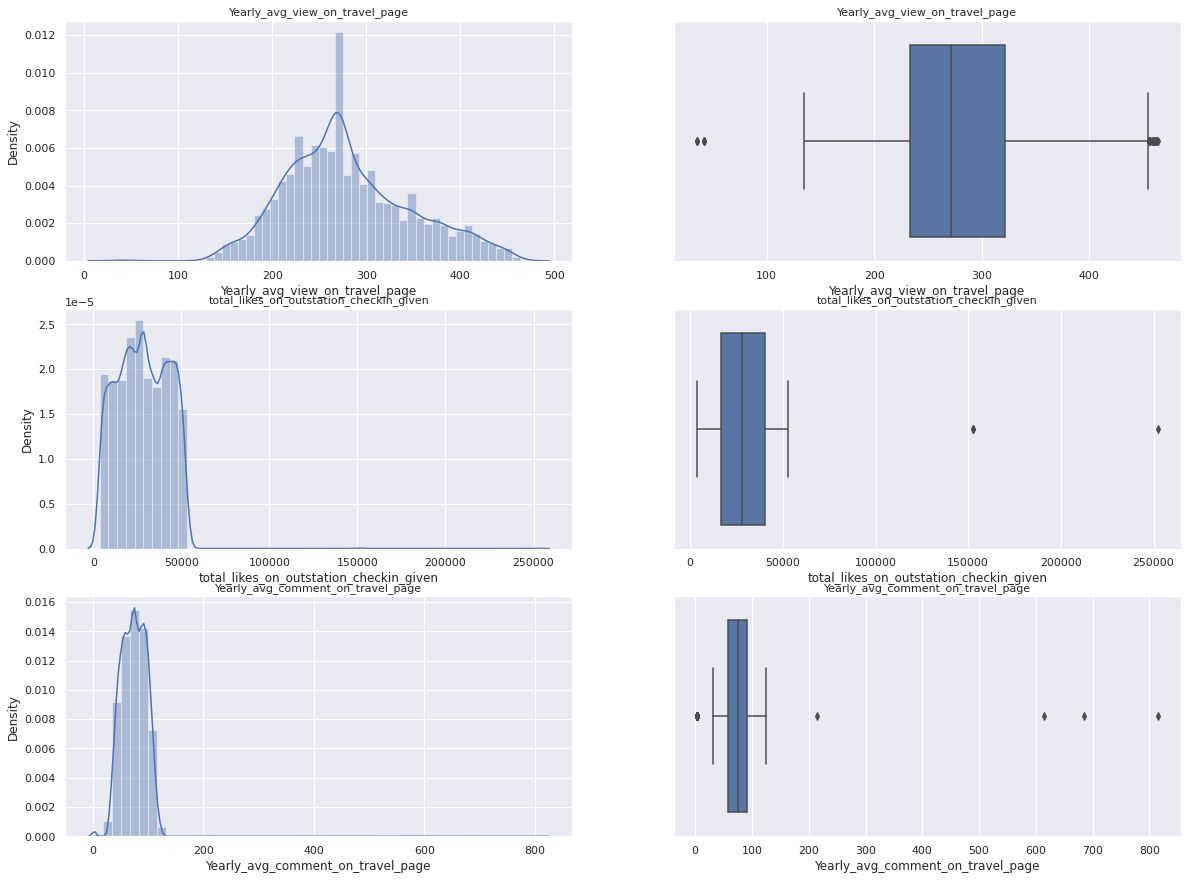

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20,15)
a = sns.distplot(social_df['Yearly_avg_view_on_travel_page'], ax = axes[0][0])
a.set_title('Yearly_avg_view_on_travel_page', fontsize = 11)

a = sns.boxplot(social_df['Yearly_avg_view_on_travel_page'],orient ="v", ax = axes[0][1])
a.set_title("Yearly_avg_view_on_travel_page",fontsize=11)

a = sns.distplot(social_df['total_likes_on_outstation_checkin_given'], ax = axes[1][0])
a.set_title('total_likes_on_outstation_checkin_given', fontsize = 11)

a = sns.boxplot(social_df['total_likes_on_outstation_checkin_given'],orient ="v", ax = axes[1][1])
a.set_title('total_likes_on_outstation_checkin_given', fontsize = 11)

a = sns.distplot(social_df['Yearly_avg_comment_on_travel_page'], ax = axes[2][0])
a.set_title('Yearly_avg_comment_on_travel_page', fontsize = 11)

a = sns.boxplot(social_df['Yearly_avg_comment_on_travel_page'],orient ="v", ax = axes[2][1])
a.set_title('Yearly_avg_comment_on_travel_page', fontsize = 11)



plt.show()

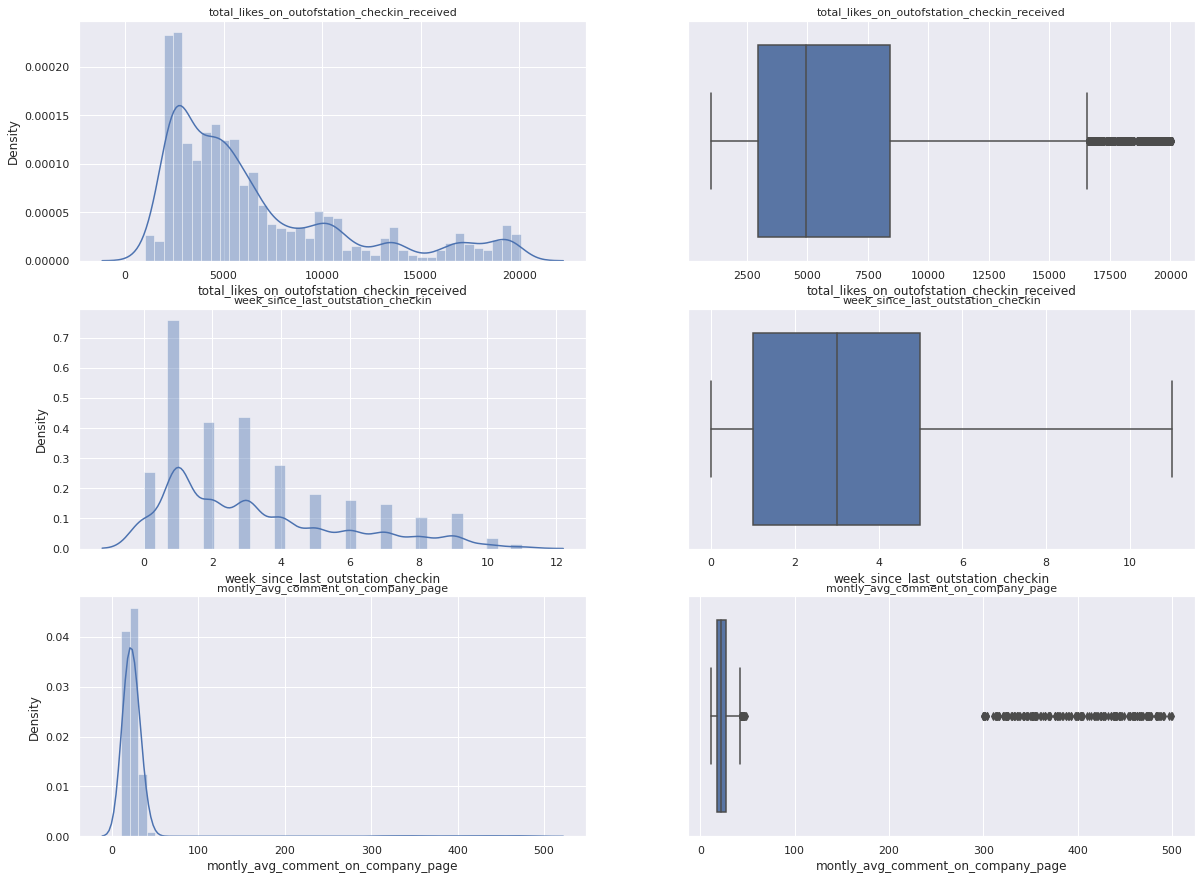

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20,15)
a = sns.distplot(social_df['total_likes_on_outofstation_checkin_received'], ax = axes[0][0])
a.set_title('total_likes_on_outofstation_checkin_received', fontsize = 11)

a = sns.boxplot(social_df['total_likes_on_outofstation_checkin_received'],orient ="v", ax = axes[0][1])
a.set_title("total_likes_on_outofstation_checkin_received",fontsize=11)

a = sns.distplot(social_df['week_since_last_outstation_checkin'], ax = axes[1][0])
a.set_title('week_since_last_outstation_checkin', fontsize = 11)

a = sns.boxplot(social_df['week_since_last_outstation_checkin'],orient ="v", ax = axes[1][1])
a.set_title('week_since_last_outstation_checkin', fontsize = 11)

a = sns.distplot(social_df['montly_avg_comment_on_company_page'], ax = axes[2][0])
a.set_title('montly_avg_comment_on_company_page', fontsize = 11)

a = sns.boxplot(social_df['montly_avg_comment_on_company_page'],orient ="v", ax = axes[2][1])
a.set_title('montly_avg_comment_on_company_page', fontsize = 11)



plt.show()

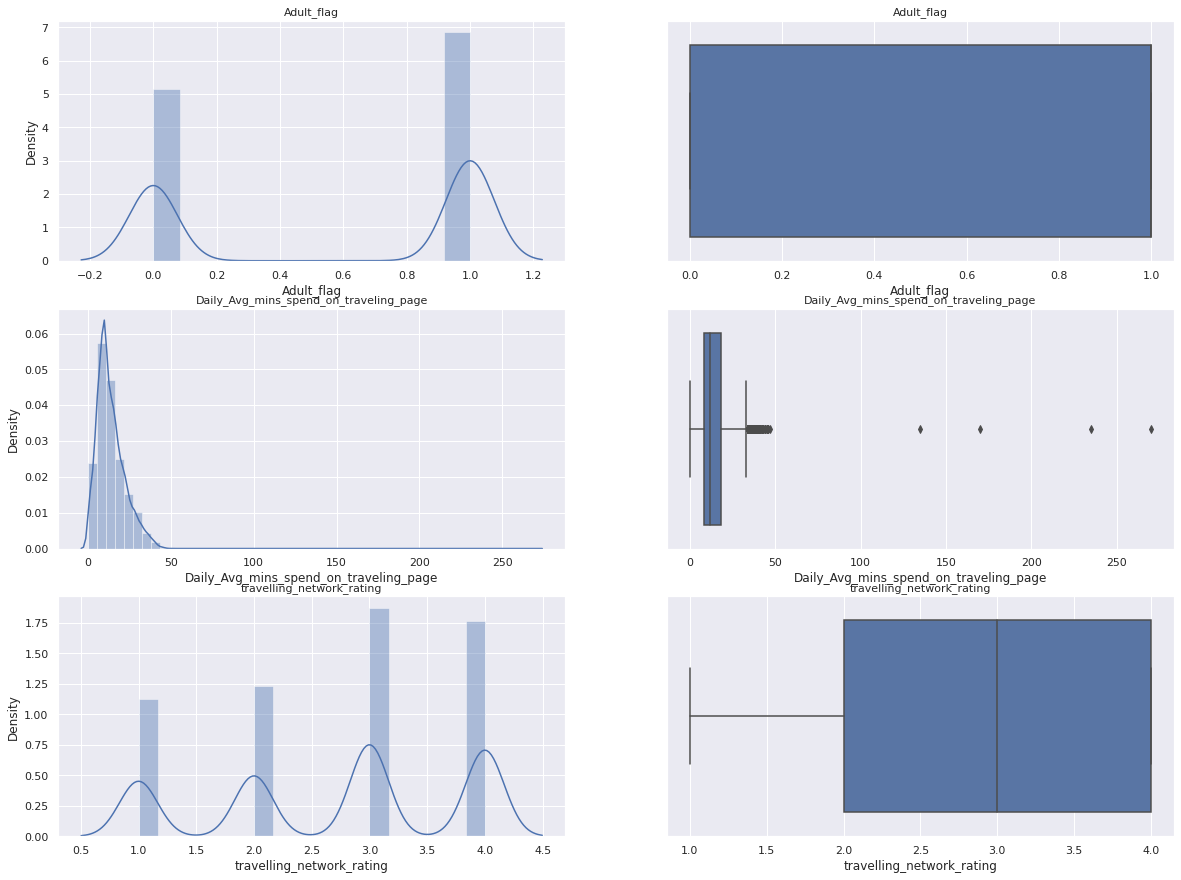

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(20,15)
a = sns.distplot(social_df['Adult_flag'], ax = axes[0][0])
a.set_title('Adult_flag', fontsize = 11)

a = sns.boxplot(social_df['Adult_flag'],orient ="v", ax = axes[0][1])
a.set_title("Adult_flag",fontsize=11)

a = sns.distplot(social_df['Daily_Avg_mins_spend_on_traveling_page'], ax = axes[1][0])
a.set_title('Daily_Avg_mins_spend_on_traveling_page', fontsize = 11)

a = sns.boxplot(social_df['Daily_Avg_mins_spend_on_traveling_page'],orient ="v", ax = axes[1][1])
a.set_title('Daily_Avg_mins_spend_on_traveling_page', fontsize = 11)

a = sns.distplot(social_df['travelling_network_rating'], ax = axes[2][0])
a.set_title('travelling_network_rating', fontsize = 11)

a = sns.boxplot(social_df['travelling_network_rating'],orient ="v", ax = axes[2][1])
a.set_title('travelling_network_rating', fontsize = 11)



plt.show()

In [ ]:
social_df.skew()

Yearly_avg_view_on_travel_page                  0.446136
preferred_device                               -2.778436
total_likes_on_outstation_checkin_given         0.498413
yearly_avg_Outstation_checkins                  0.977798
member_in_family                                0.001205
Yearly_avg_comment_on_travel_page               4.910947
total_likes_on_outofstation_checkin_received    1.368578
week_since_last_outstation_checkin              0.915334
montly_avg_comment_on_company_page              7.684150
travelling_network_rating                      -0.302557
Adult_flag                                     -0.285906
Daily_Avg_mins_spend_on_traveling_page          4.480682
dtype: float64

In case of categorical variable we are interested to know the frequencies of levels .We can observe the frequencies in terms of countplot for categorical variables 

Analyzing Categorical Variable Frquencies levels using seaborn countplots which gives the counts of observations in each category 

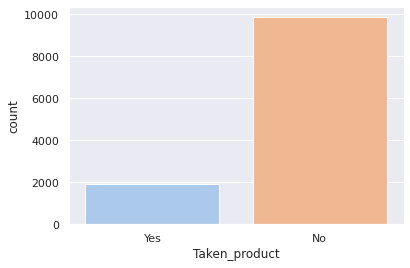

In [ ]:
sns.countplot(x='Taken_product',data=social_df,palette='pastel')

In [ ]:
social_df['Taken_product'].value_counts(normalize=True)*100

No     83.877551
Yes    16.122449
Name: Taken_product, dtype: float64

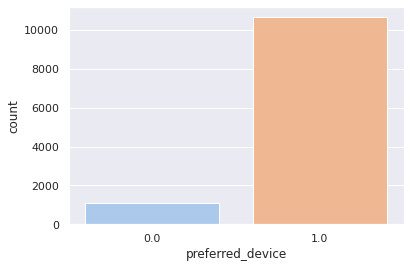

In [ ]:
sns.countplot(x = 'preferred_device', data = social_df, palette='pastel')

In [ ]:
social_df['preferred_device'].value_counts(normalize=True)*100

1.0    90.578231
0.0     9.421769
Name: preferred_device, dtype: float64

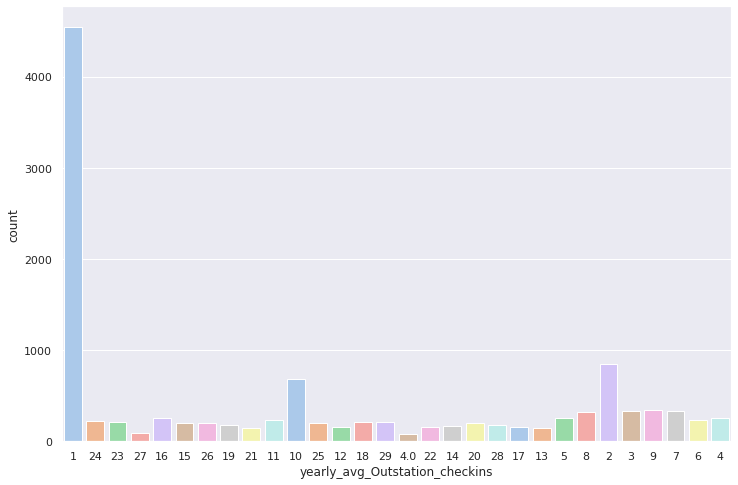

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'yearly_avg_Outstation_checkins', data = social_df, palette='pastel');

In [ ]:
social_df['yearly_avg_Outstation_checkins'].value_counts(normalize=True)

1      0.386395
2      0.071769
10     0.057993
9      0.028912
7      0.028571
3      0.028571
8      0.027211
5      0.022194
4      0.021769
16     0.021684
6      0.020068
11     0.019473
24     0.018963
29     0.018282
23     0.018282
18     0.017687
15     0.017517
26     0.016922
20     0.016922
25     0.016837
28     0.015306
19     0.014966
14     0.014201
17     0.013605
12     0.013520
22     0.012925
13     0.012755
21     0.012160
27     0.008163
4.0    0.006378
Name: yearly_avg_Outstation_checkins, dtype: float64

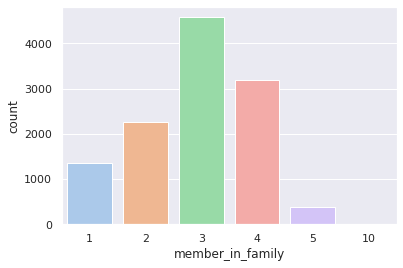

In [ ]:
sns.countplot(x = 'member_in_family', data = social_df, palette='pastel')

In [ ]:
social_df.member_in_family.value_counts(normalize=True)*100

3     38.911565
4     27.074830
2     19.183673
1     11.471088
5      3.265306
10     0.093537
Name: member_in_family, dtype: float64

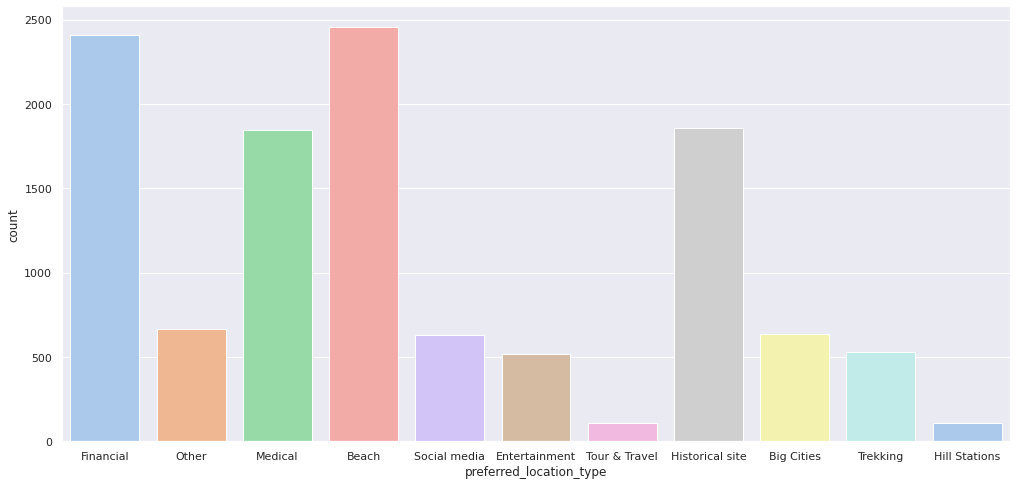

In [ ]:
plt.figure(figsize=(17,8))
sns.countplot(x = 'preferred_location_type', data = social_df, palette='pastel')

In [ ]:
social_df.preferred_location_type.value_counts(normalize=True)*100

Beach              20.875850
Financial          20.484694
Historical site    15.782313
Medical            15.688776
Other               5.671769
Big Cities          5.408163
Social media        5.382653
Trekking            4.489796
Entertainment       4.387755
Hill Stations       0.918367
Tour & Travel       0.909864
Name: preferred_location_type, dtype: float64

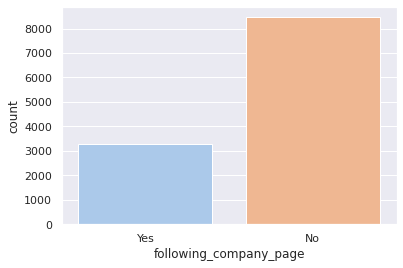

In [ ]:
sns.countplot(x = 'following_company_page', data = social_df, palette='pastel')

In [ ]:
social_df.following_company_page.value_counts(normalize=True )*100

No     71.964286
Yes    28.035714
Name: following_company_page, dtype: float64

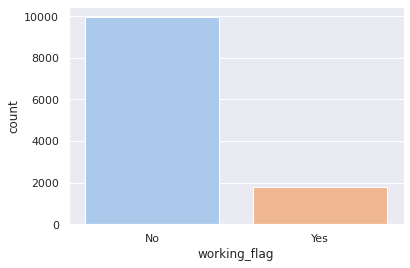

In [ ]:
sns.countplot(x = 'working_flag', data = social_df, palette='pastel')

In [ ]:
social_df.working_flag.value_counts(normalize=True)*100

No     84.62585
Yes    15.37415
Name: working_flag, dtype: float64

## 3-B) Bivariate Analysis :  .

We will pick two numerical variable and try to understand the relationship between them

In [ ]:
import seaborn as sns
import scipy.stats as stats

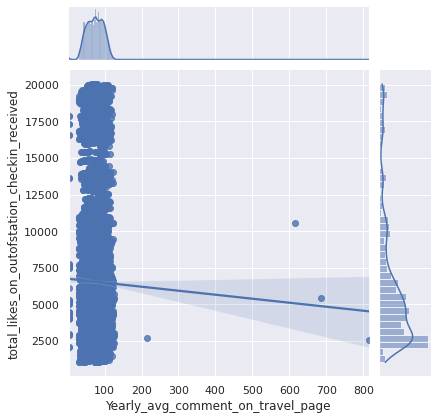

In [ ]:
sns.set( style='darkgrid', color_codes=True)
sns.jointplot(x = 'Yearly_avg_comment_on_travel_page', y = 'total_likes_on_outofstation_checkin_received', data = social_df, kind = 'reg');

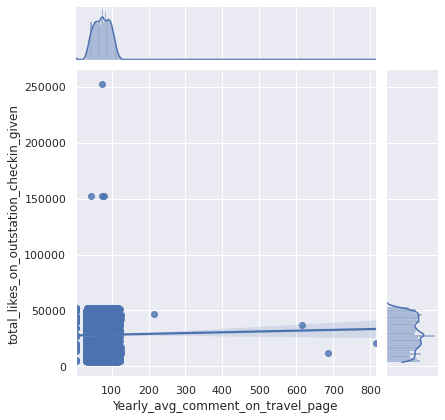

In [ ]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='Yearly_avg_comment_on_travel_page',y='total_likes_on_outstation_checkin_given',data = social_df, kind='reg');

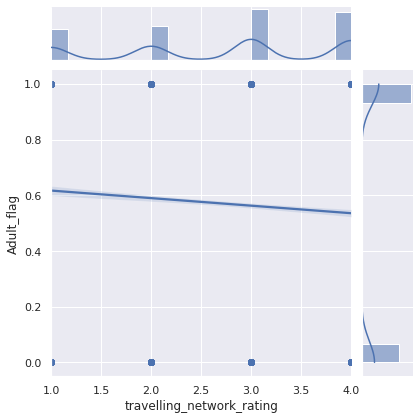

In [ ]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='travelling_network_rating',y='Adult_flag',data = social_df, kind='reg');

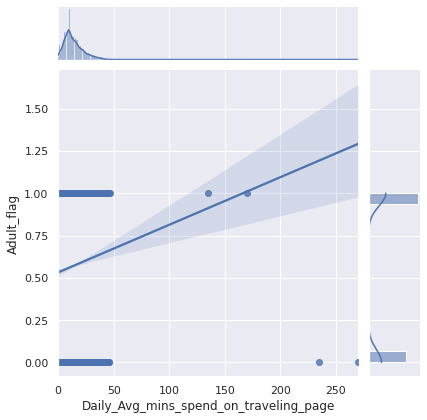

In [ ]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot(x='Daily_Avg_mins_spend_on_traveling_page',y='Adult_flag',data = social_df, kind='reg')

Bivariate for 2 categorical variables

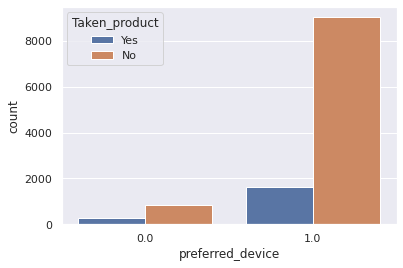

In [ ]:
sns.countplot(x='preferred_device',hue='Taken_product',data =social_df )

In [ ]:
round(pd.crosstab(social_df['preferred_device'],social_df['Taken_product'],margins=True,normalize=True)*100,2)

Taken_product,No,Yes,All
preferred_device,,,
0.0,7.07,2.35,9.42
1.0,76.80,13.78,90.58
All,83.88,16.12,100.00


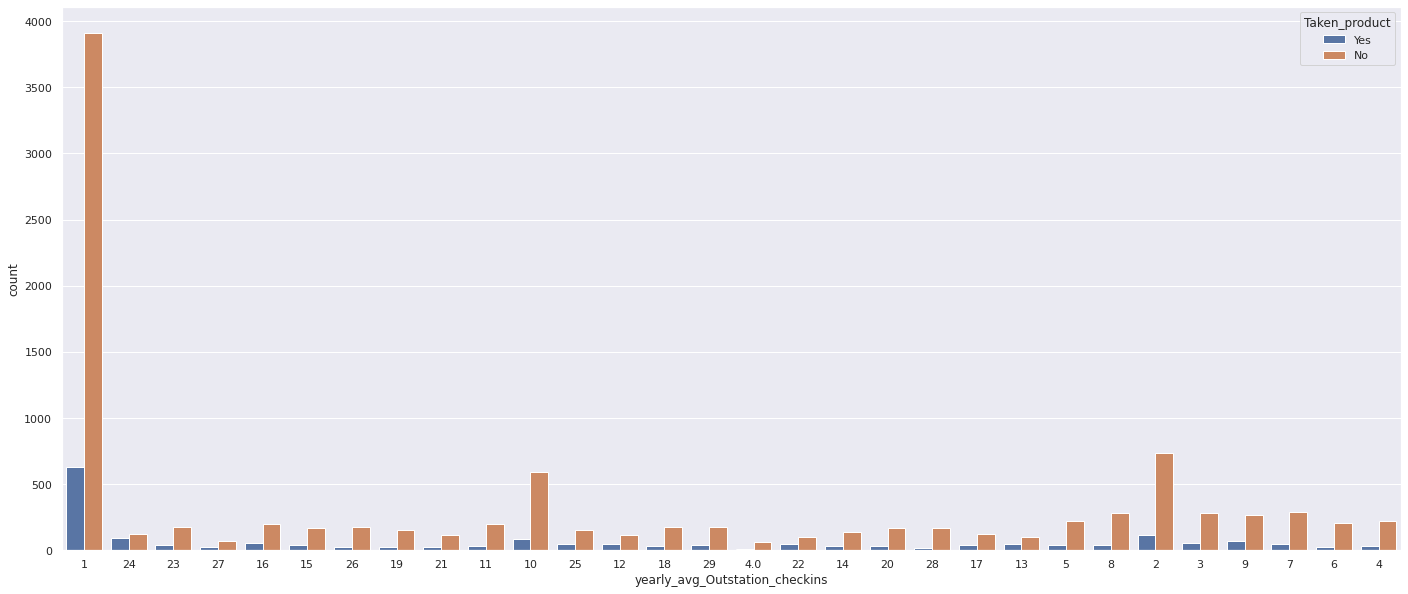

In [ ]:
plt.figure(figsize=(24,10))
sns.countplot(x = 'yearly_avg_Outstation_checkins', hue = 'Taken_product', data = social_df);

In [ ]:
round(pd.crosstab(social_df['yearly_avg_Outstation_checkins'], social_df['Taken_product'], margins=True, normalize=True)*100,2)

Taken_product,No,Yes,All
yearly_avg_Outstation_checkins,,,
1,33.28,5.36,38.64
4.0,0.55,0.09,0.64
10,5.05,0.75,5.80
11,1.68,0.27,1.95
12,0.95,0.40,1.35
13,0.88,0.39,1.28
14,1.15,0.27,1.42
15,1.41,0.34,1.75
16,1.69,0.48,2.17


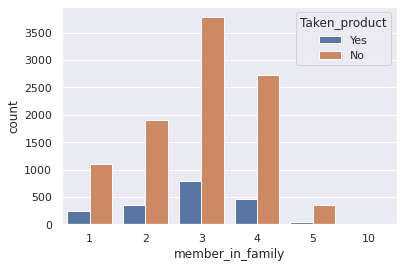

In [ ]:
sns.countplot(x = 'member_in_family', hue = 'Taken_product', data = social_df);

In [ ]:
round(pd.crosstab(social_df.member_in_family, social_df.Taken_product, margins=True, normalize=True)*100,2)

Taken_product,No,Yes,All
member_in_family,,,
1,9.37,2.10,11.47
2,16.19,2.99,19.18
3,32.18,6.73,38.91
4,23.13,3.95,27.07
5,2.93,0.34,3.27
10,0.09,0.01,0.09
All,83.88,16.12,100.00


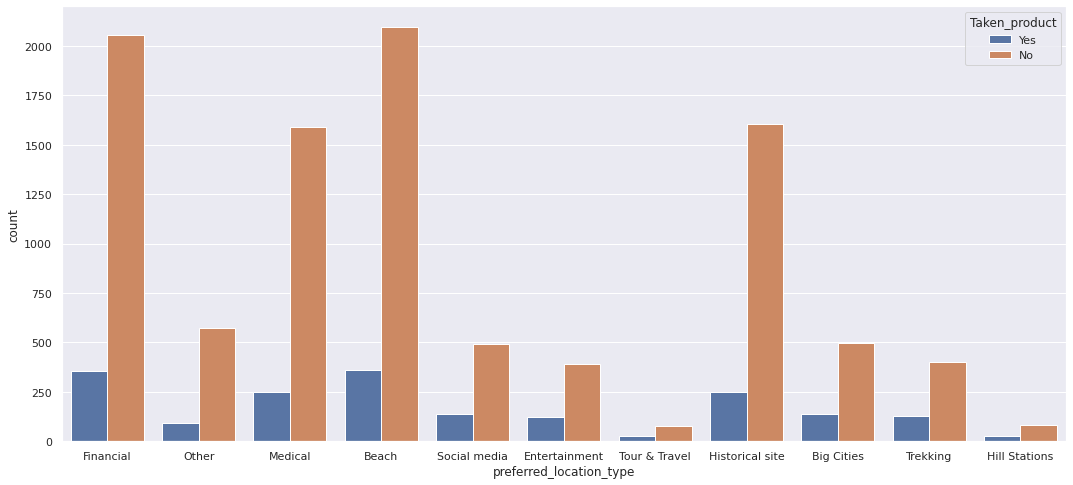

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x = 'preferred_location_type', hue = 'Taken_product', data = social_df);

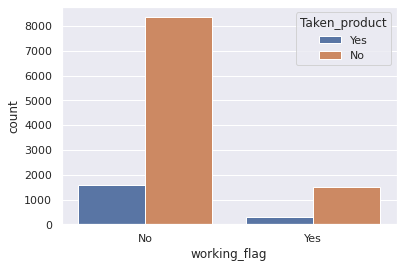

In [ ]:
sns.countplot(x = 'working_flag', hue = 'Taken_product', data = social_df);

In [ ]:
round(pd.crosstab(social_df.working_flag, social_df.Taken_product,margins=True, normalize=True )*100,2)

Taken_product,No,Yes,All
working_flag,,,
No,71.02,13.61,84.63
Yes,12.86,2.52,15.37
All,83.88,16.12,100.00


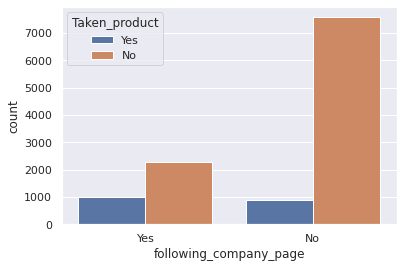

In [ ]:
sns.countplot(x = 'following_company_page', hue = 'Taken_product', data = social_df);

In [ ]:
round(pd.crosstab(social_df.following_company_page, social_df.Taken_product, margins=True, normalize=True)*100,2)

Taken_product,No,Yes,All
following_company_page,,,
No,64.40,7.57,71.96
Yes,19.48,8.55,28.04
All,83.88,16.12,100.00


categorical vs numeric variables

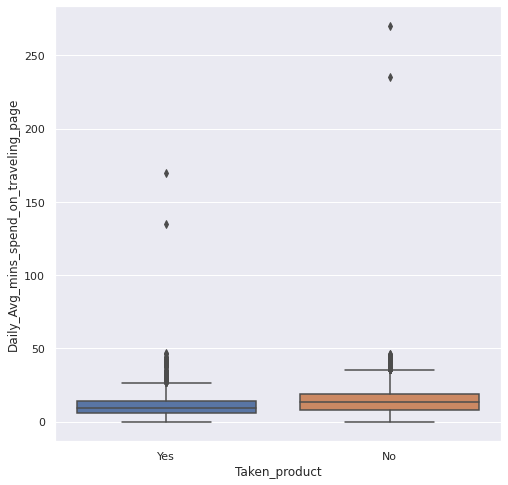

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Taken_product', y = 'Daily_Avg_mins_spend_on_traveling_page', data = social_df);

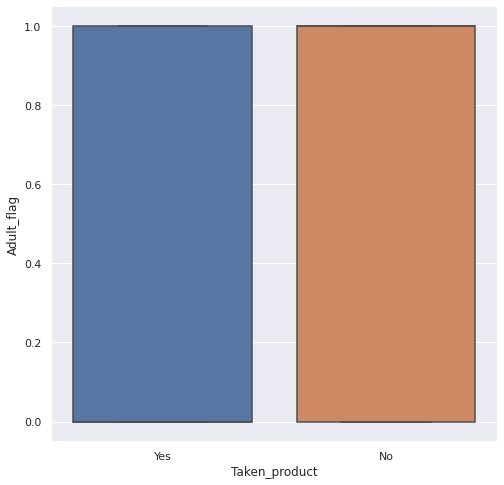

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Taken_product',y='Adult_flag',data=social_df)

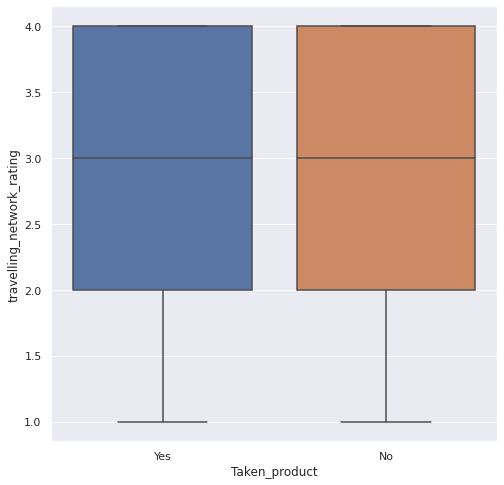

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Taken_product',y='travelling_network_rating',data=social_df);

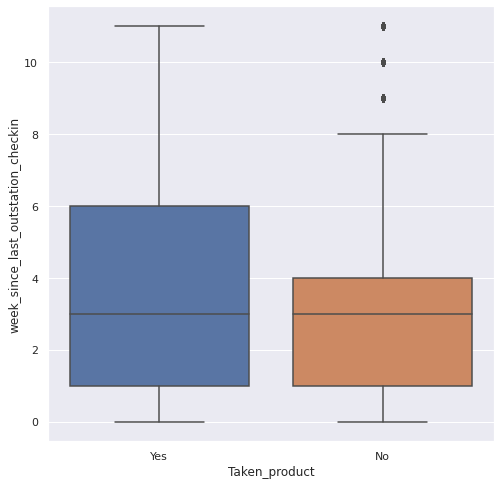

In [ ]:
plt.figure(figsize=(8,8))
#sns.boxplot(x = 'Taken_product', y = 'montly_avg_comment_on_company_page', data = social_df);
sns.boxplot(x='Taken_product',y='week_since_last_outstation_checkin',data=social_df);

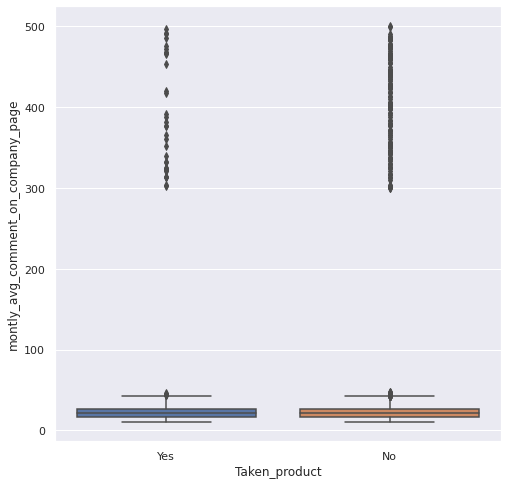

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Taken_product',y='montly_avg_comment_on_company_page',data=social_df);

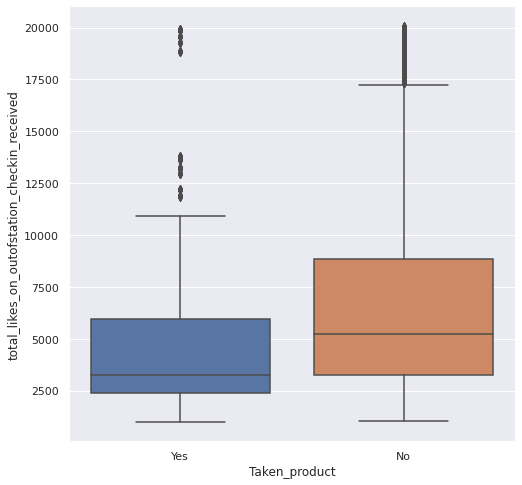

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Taken_product',y='total_likes_on_outofstation_checkin_received',data=social_df);

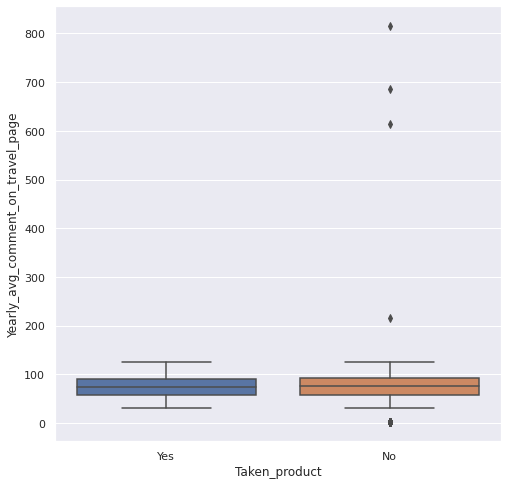

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Taken_product',y='Yearly_avg_comment_on_travel_page',data=social_df);

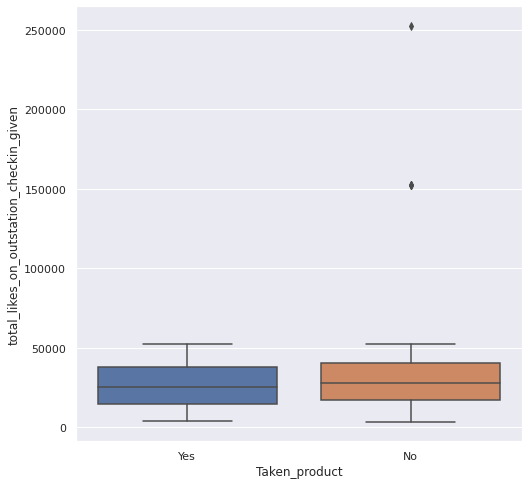

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Taken_product',y='total_likes_on_outstation_checkin_given',data=social_df);

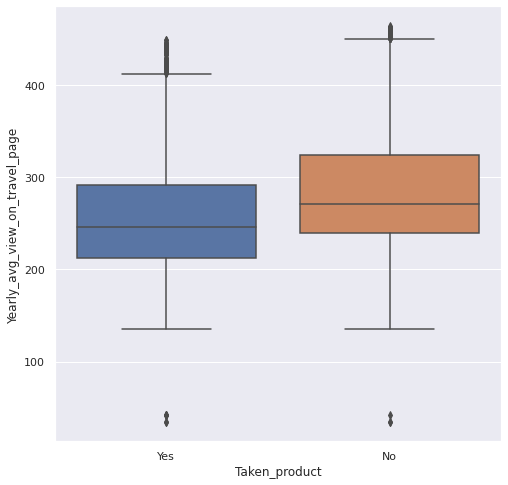

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Taken_product',y='Yearly_avg_view_on_travel_page',data=social_df);

## 3-C) Multivariate Analysis

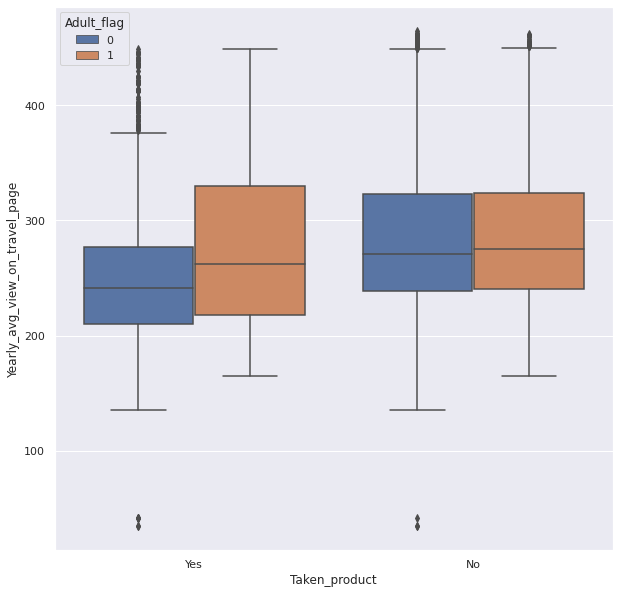

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Taken_product',y='Yearly_avg_view_on_travel_page',data=social_df,hue='Adult_flag')

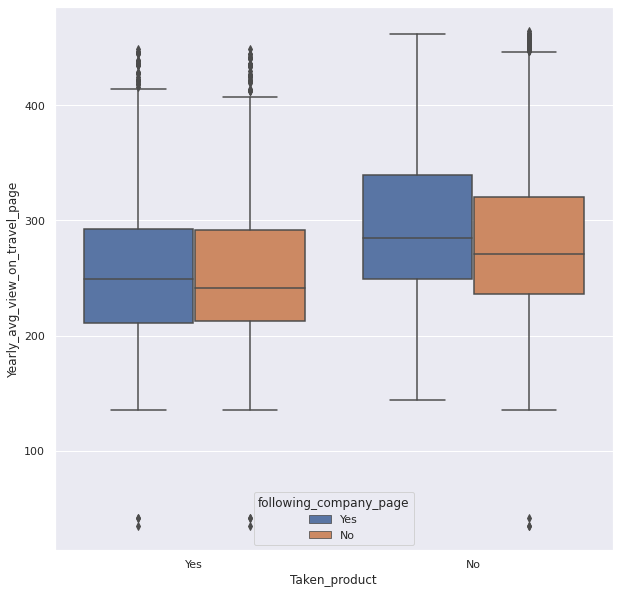

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Taken_product',y='Yearly_avg_view_on_travel_page',data=social_df,hue='following_company_page')

Correlation Heatmap

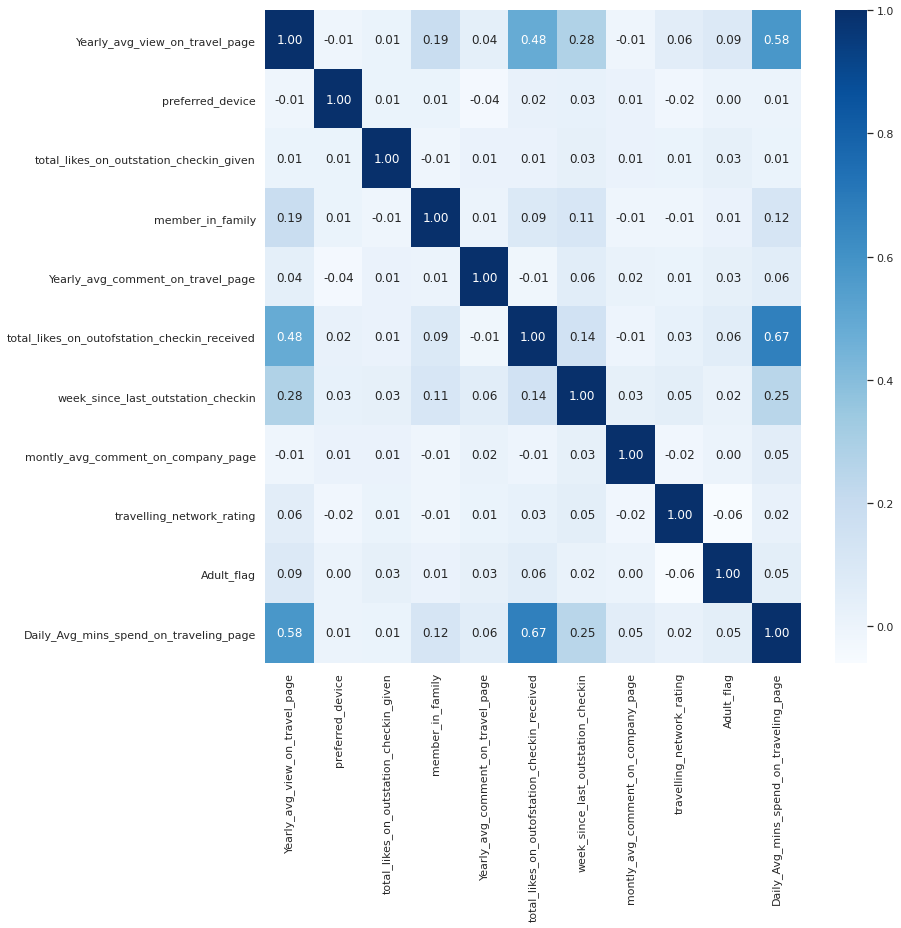

In [ ]:

plt.figure(figsize=(12,12))
sns.heatmap(social_df.corr(), annot=True, fmt='.2f', cmap='Blues');

## 4) Data Preparation

In [ ]:
social_df.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,Yes,307.0,1.0,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,No,367.0,1.0,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,Yes,277.0,1.0,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,No,247.0,1.0,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,No,202.0,1.0,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [ ]:
cat=[]
num=[]
for i in social_df.columns:
    if social_df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Taken_product', 'yearly_avg_Outstation_checkins', 'preferred_location_type', 'following_company_page', 'working_flag']
['Yearly_avg_view_on_travel_page', 'preferred_device', 'total_likes_on_outstation_checkin_given', 'member_in_family', 'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin', 'montly_avg_comment_on_company_page', 'travelling_network_rating', 'Adult_flag', 'Daily_Avg_mins_spend_on_traveling_page']


Data Encoding

In [ ]:
social_df.preferred_device.value_counts()

1.0    10652
0.0     1108
Name: preferred_device, dtype: int64

In [ ]:
#social_df.preferred_device = social_df.preferred_device.replace({'mobile':2,'Tab':1,'Laptop':0})

In [ ]:
social_df.preferred_device.value_counts()

1.0    10652
0.0     1108
Name: preferred_device, dtype: int64

In [ ]:
social_df.preferred_location_type.value_counts()

Beach              2455
Financial          2409
Historical site    1856
Medical            1845
Other               667
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour & Travel       107
Name: preferred_location_type, dtype: int64

In [ ]:
social_df.preferred_location_type = social_df.preferred_location_type.replace({'Tour & Travel':0,
                                                                               'Hill Stations':1,
                                                                               'Entertainment':2,
                                                                               'Trekking':3,
                                                                               'Social media':4,
                                                                               'Big Cities':5,
                                                                               'Other':6,
                                                                               'Medical':7,
                                                                               'Historical site':8,
                                                                               'Financial':9,
                                                                               'Beach':10})

In [ ]:
social_df.preferred_location_type.value_counts()

10    2455
9     2409
8     1856
7     1845
6      667
5      636
4      633
3      528
2      516
1      108
0      107
Name: preferred_location_type, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  float64
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  object 
 5   member_in_family                              11760 non-null  int64  
 6   preferred_location_type                       11760 non-null  int64  
 7   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 non-null 

In [ ]:
 #laptop=social_df.loc[social_df.preferred_device==0]

In [ ]:
#social_df.to_csv('/content/drive/MyDrive/Abhay/Capstone Project/Social Media_Tourism_Project/Data /laptop_without_Outlier__Simple Imputation.csv', index=False)

In [ ]:
# mobile=social_df.loc[social_df.preferred_device==1]

In [ ]:
#mobile.to_csv('/content/drive/MyDrive/Abhay/Capstone Project/Social Media_Tourism_Project/Data /mobile_without_Outlier_Simple Imputation.csv', index=False)

Outlier Check

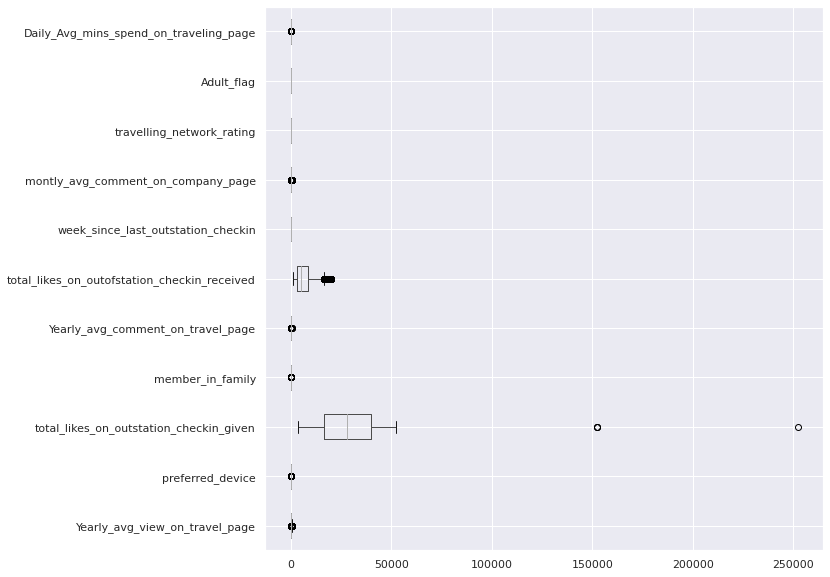

In [ ]:
plt.figure(figsize=(10,10))
social_df[num].boxplot(vert=0)
plt.show()

In [ ]:
social_df.skew()

Yearly_avg_view_on_travel_page                  0.446136
preferred_device                               -2.778436
total_likes_on_outstation_checkin_given         0.498413
yearly_avg_Outstation_checkins                  0.977798
member_in_family                                0.001205
preferred_location_type                        -0.959663
Yearly_avg_comment_on_travel_page               4.910947
total_likes_on_outofstation_checkin_received    1.368578
week_since_last_outstation_checkin              0.915334
montly_avg_comment_on_company_page              7.684150
travelling_network_rating                      -0.302557
Adult_flag                                     -0.285906
Daily_Avg_mins_spend_on_traveling_page          4.480682
dtype: float64

Outlier Treatment

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in social_df.columns:
    lr,ur=remove_outlier(social_df['Yearly_avg_comment_on_travel_page'])
    social_df['Yearly_avg_comment_on_travel_page']=np.where(social_df['Yearly_avg_comment_on_travel_page']>ur,ur,social_df['Yearly_avg_comment_on_travel_page'])
    social_df['Yearly_avg_comment_on_travel_page']=np.where(social_df['Yearly_avg_comment_on_travel_page']<lr,lr,social_df['Yearly_avg_comment_on_travel_page'])

    lr,ur=remove_outlier(social_df['Yearly_avg_view_on_travel_page'])
    social_df['Yearly_avg_view_on_travel_page']=np.where(social_df['Yearly_avg_view_on_travel_page']>ur,ur,social_df['Yearly_avg_view_on_travel_page'])
    social_df['Yearly_avg_view_on_travel_page']=np.where(social_df['Yearly_avg_view_on_travel_page']<lr,lr,social_df['Yearly_avg_view_on_travel_page'])

    lr,ur=remove_outlier(social_df['total_likes_on_outstation_checkin_given'])
    social_df['total_likes_on_outstation_checkin_given']=np.where(social_df['total_likes_on_outstation_checkin_given']>ur,ur,social_df['total_likes_on_outstation_checkin_given'])
    social_df['total_likes_on_outstation_checkin_given']=np.where(social_df['total_likes_on_outstation_checkin_given']<lr,lr,social_df['total_likes_on_outstation_checkin_given'])

    lr,ur=remove_outlier(social_df['total_likes_on_outofstation_checkin_received'])
    social_df['total_likes_on_outofstation_checkin_received']=np.where(social_df['total_likes_on_outofstation_checkin_received']>ur,ur,social_df['total_likes_on_outofstation_checkin_received'])
    social_df['total_likes_on_outofstation_checkin_received']=np.where(social_df['total_likes_on_outofstation_checkin_received']<lr,lr,social_df['total_likes_on_outofstation_checkin_received'])
    
    lr,ur=remove_outlier(social_df['montly_avg_comment_on_company_page'])
    social_df['montly_avg_comment_on_company_page']=np.where(social_df['montly_avg_comment_on_company_page']>ur,ur,social_df['montly_avg_comment_on_company_page'])
    social_df['montly_avg_comment_on_company_page']=np.where(social_df['montly_avg_comment_on_company_page']<lr,lr,social_df['montly_avg_comment_on_company_page'])

    lr,ur=remove_outlier(social_df['Daily_Avg_mins_spend_on_traveling_page'])
    social_df['Daily_Avg_mins_spend_on_traveling_page']=np.where(social_df['Daily_Avg_mins_spend_on_traveling_page']>ur,ur,social_df['Daily_Avg_mins_spend_on_traveling_page'])
    social_df['Daily_Avg_mins_spend_on_traveling_page']=np.where(social_df['Daily_Avg_mins_spend_on_traveling_page']<lr,lr,social_df['Daily_Avg_mins_spend_on_traveling_page'])



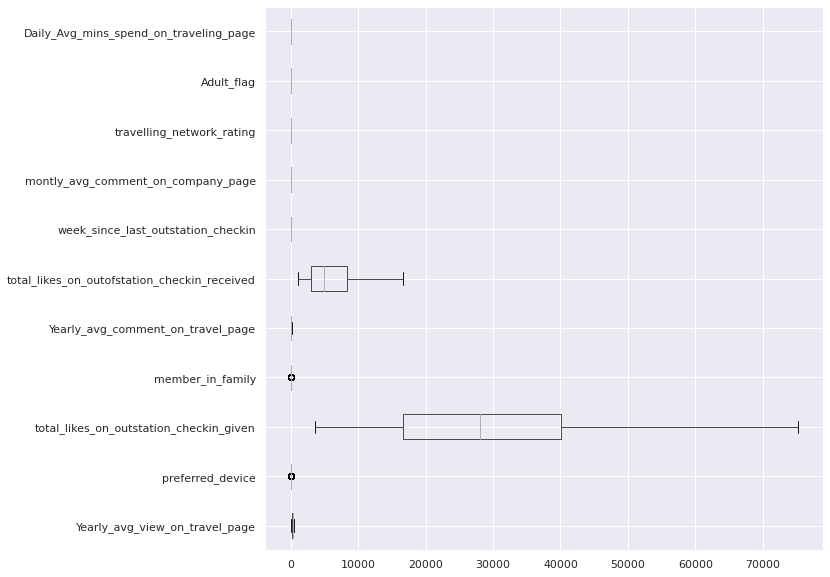

In [ ]:
# Outlier Check
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
social_df[num].boxplot(vert=0)
plt.show()

Skewness in Data

In [ ]:
social_df.skew()

Yearly_avg_view_on_travel_page                  0.467096
preferred_device                               -2.778436
total_likes_on_outstation_checkin_given         0.006904
yearly_avg_Outstation_checkins                  0.977798
member_in_family                                0.001205
preferred_location_type                        -0.959663
Yearly_avg_comment_on_travel_page              -0.074694
total_likes_on_outofstation_checkin_received    1.163915
week_since_last_outstation_checkin              0.915334
montly_avg_comment_on_company_page              0.503916
travelling_network_rating                      -0.302557
Adult_flag                                     -0.285906
Daily_Avg_mins_spend_on_traveling_page          0.719267
dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
social_df = pd.get_dummies(social_df,columns=['Adult_flag'], drop_first=True)
social_df = pd.get_dummies(social_df,columns=['working_flag'], drop_first=True)
social_df = pd.get_dummies(social_df,columns=['following_company_page'], drop_first=True)


In [ ]:
social_df.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Adult_flag_1,working_flag_Yes,following_company_page_Yes
0,Yes,307.0,1.0,38570.0,1,2,9,94.0,5993.0,8,11.0,1,8.0,0,0,1
1,No,367.0,1.0,9765.0,1,1,9,61.0,5130.0,1,23.0,4,10.0,1,1,0
2,Yes,277.0,1.0,48055.0,1,2,6,92.0,2090.0,6,15.0,2,7.0,0,0,1
3,No,247.0,1.0,48720.0,1,4,9,56.0,2909.0,1,11.0,3,8.0,0,0,1
4,No,202.0,1.0,20685.0,1,1,7,40.0,3468.0,9,12.0,4,6.0,1,0,0


In [ ]:
social_df.Taken_product = social_df.Taken_product.replace({"Yes":1,"No":0})

In [ ]:
social_df.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Adult_flag_1,working_flag_Yes,following_company_page_Yes
0,1,307.0,1.0,38570.0,1,2,9,94.0,5993.0,8,11.0,1,8.0,0,0,1
1,0,367.0,1.0,9765.0,1,1,9,61.0,5130.0,1,23.0,4,10.0,1,1,0
2,1,277.0,1.0,48055.0,1,2,6,92.0,2090.0,6,15.0,2,7.0,0,0,1
3,0,247.0,1.0,48720.0,1,4,9,56.0,2909.0,1,11.0,3,8.0,0,0,1
4,0,202.0,1.0,20685.0,1,1,7,40.0,3468.0,9,12.0,4,6.0,1,0,0


## Save File

In [ ]:
laptop=social_df.loc[social_df.preferred_device==0]

In [ ]:
laptop.shape

(1108, 16)

In [ ]:
laptop.to_csv('/content/drive/MyDrive/Abhay/Capstone Project/Social Media_Tourism_Project/Data /Laptop_EDA_Data_Cleaning_Simple Imputation.csv', index=False)

In [ ]:
mobile=social_df.loc[social_df.preferred_device==1]

In [ ]:
mobile.to_csv('/content/drive/MyDrive/Abhay/Capstone Project/Social Media_Tourism_Project/Data /mobile_EDA_Data_Cleaning_Simple Imputation.csv', index=False)

In [ ]:
mobile.shape

(10652, 16)